# Importing the Liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\nk121\Desktop\Python Project\Amazon Sale Report.csv")

# Inspect the Dataset

In [3]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


# Drop Unnecessary Columns

In [4]:
df.drop(["index", "fulfilled-by", "New", "PendingS", 'currency', 'ship-country'], axis = 1, inplace = True)
#df = df.drop(["index", "fulfilled-by", "New", "PendingS"], axis = 1)

# Handle Missing Values

In [5]:
df.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
B2B                      0
dtype: int64

In [6]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [7]:
df['ship-city'] = df['ship-city'].fillna(df['ship-city'].mode()[0])

In [8]:
df['ship-state'] = df['ship-state'].fillna(df['ship-state'].mode()[0])

In [9]:
df['ship-postal-code'] = df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0])

# Remove Duplicates

In [10]:
df = df.drop_duplicates()

# Fix Data Types

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
#df['ship-postal-code'] = pd.to_numeric(df['ship-postal-code'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128017 entries, 0 to 128975
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128017 non-null  object        
 1   Date                128017 non-null  datetime64[ns]
 2   Status              128017 non-null  object        
 3   Fulfilment          128017 non-null  object        
 4   Sales Channel       128017 non-null  object        
 5   ship-service-level  128017 non-null  object        
 6   Category            128017 non-null  object        
 7   Size                128017 non-null  object        
 8   Courier Status      128017 non-null  object        
 9   Qty                 128017 non-null  int64         
 10  Amount              128017 non-null  float64       
 11  ship-city           128017 non-null  object        
 12  ship-state          128017 non-null  object        
 13  ship-postal-code    128017 non-nul

# Handle Outliers

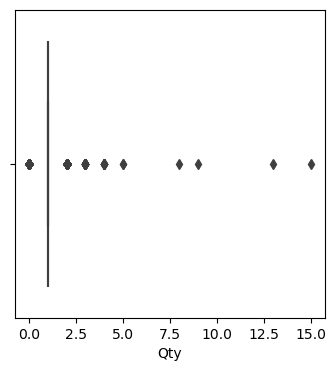

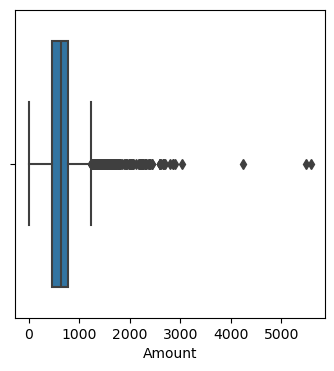

In [13]:
for i in df.select_dtypes(include=['number']).columns[:2]: # df.columns
    plt.figure(figsize = (4, 4))
    sns.boxplot(x = df[i])
    plt.show()

z score method

In [14]:
upper_limit = df['Qty'].mean() +3*df['Qty'].std()
lower_limit = df['Qty'].mean() -3*df['Qty'].std()
print(upper_limit, lower_limit)

1.8409182460455258 -0.02939321421381602


In [15]:
# Finding the outliers
outlier_df1 = df.loc[(df['Qty']>upper_limit) | (df['Qty']<lower_limit)]

# Trimming - removing the outliers
df = df.loc[(df['Qty']<upper_limit) & (df['Qty']>lower_limit)]

IQR method

In [16]:
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
print(upper_limit, lower_limit)

1239.0 -9.0


In [17]:
# Finding the outliers
outlier_df2 = df[(df['Amount'] > upper_limit) | (df['Amount'] < lower_limit)]

# Trimming - removing the outliers
df = df[(df['Amount'] < upper_limit) & (df['Amount'] > lower_limit)]

In [18]:
df = df.reset_index(drop =True)

# Standardize Text Data

In [19]:
for i in df.select_dtypes(include=['object']).columns:
    df[i] = df[i].str.strip().str.lower()  # Trim and lowercase

In [20]:
#rename columns
df = df.rename(columns={'Qty':'Quantity'})

In [21]:
df['ship-state'] = df['ship-state'].replace({'rajshthan': 'rajasthan', 'nl':'nagaland', 'new delhi':'delhi',
                                             'punjab/mohali/zirakpur':'punjab', 'rj':'rajasthan', 'orissa':'odisha',
                                             'pb':'punjab', 'apo':'andhra pradesh', 'ar':'arunachal pradesh',
                                             'pondicherry':'puducherry', 'rajsthan':'rajasthan'})

# Data Analysis and Visualizations

In [22]:
df.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-city,ship-state
count,123633,123633,123633,123633,123633,123633,123633,123633,123633,123633
unique,116319,13,2,2,2,9,11,4,7164,36
top,171-5057375-2831560,shipped,amazon,amazon.in,expedited,shirt,m,shipped,bengaluru,maharashtra
freq,12,74560,85995,123518,84923,49165,21425,104810,11453,21494


# Exploratory Data Analysis

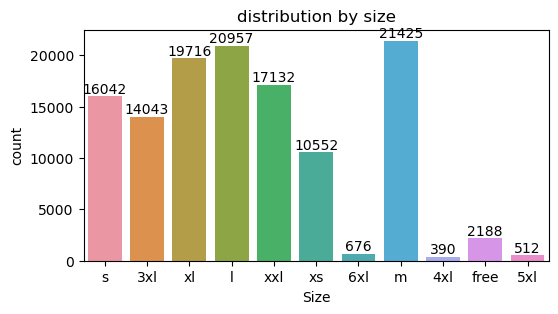

In [23]:
plt.figure(figsize=(6, 3))
plt.title('distribution by size')
ax = sns.countplot(x = 'Size', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# groupby()

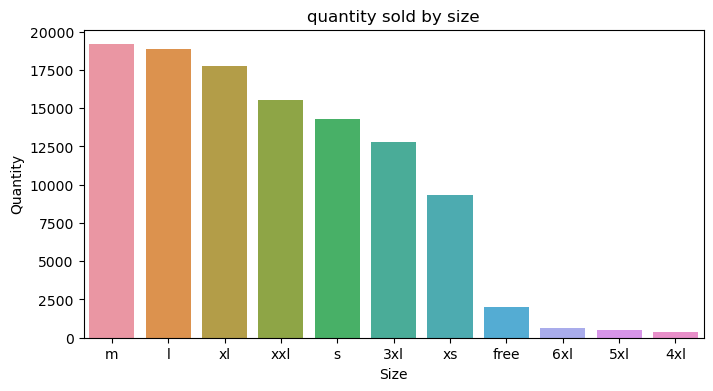

In [24]:
size_qty = df.groupby(['Size'], as_index = False)['Quantity'].sum().sort_values(by= 'Quantity', ascending = False)
plt.figure(figsize = (8,4))
sns.barplot(x = 'Size', y = 'Quantity', data = size_qty)
plt.title('quantity sold by size')
plt.show()

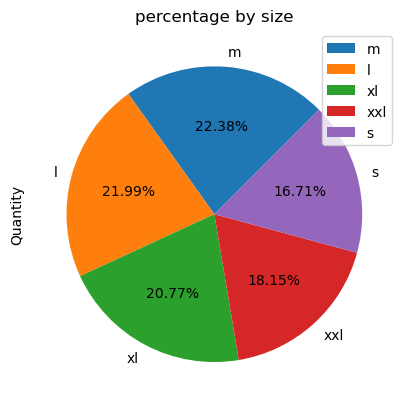

In [25]:
sale_volume = df.groupby('Size')['Quantity'].sum().sort_values(ascending = False).head(5)
sale_volume.plot(kind = 'pie', legend = True, labels = sale_volume.index, autopct = '%1.2f%%', startangle = 45)
plt.title('percentage by size')
plt.show()

Note- from the above graph you can see that the most of people purchases m size

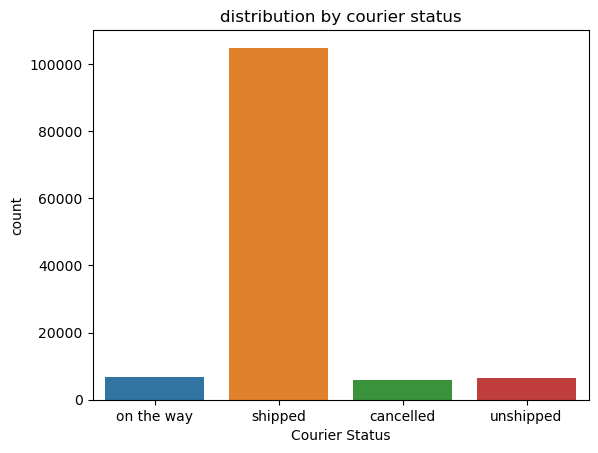

In [26]:
sns.countplot(x = 'Courier Status', data = df)
plt.title('distribution by courier status')
plt.show()

Note- from the above graph you can see that the majority of the order shipped through courier

<Axes: >

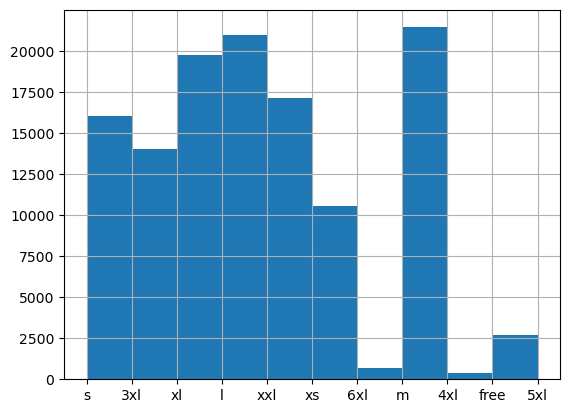

In [27]:
df['Size'].hist()

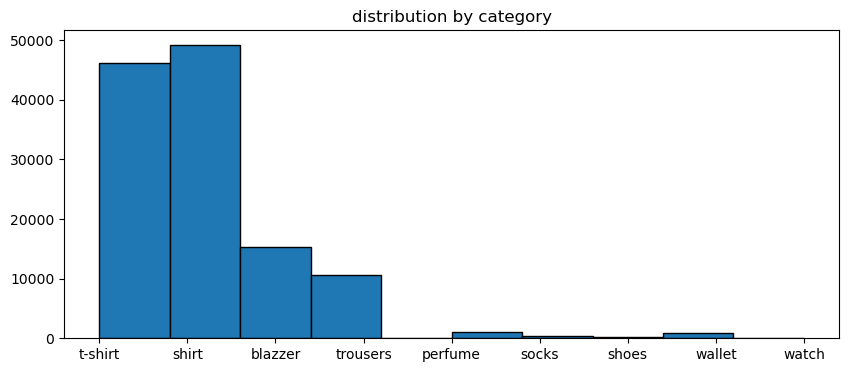

In [28]:
plt.figure(figsize = (10,4))
plt.hist(df['Category'], bins = 10, edgecolor = 'black')
plt.title('distribution by category')
plt.show()

Note- from the above graph most of the buyers are shirt

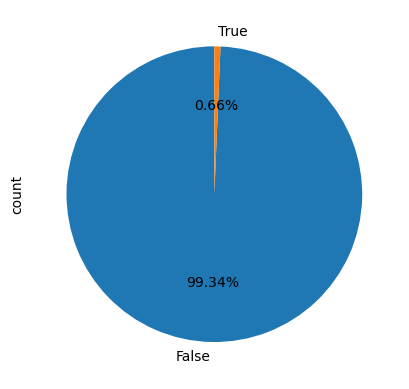

In [29]:
B2B_check = df['B2B'].value_counts()
B2B_check.plot(kind = 'pie', autopct = '%1.2f%%', labels = B2B_check.index, startangle = 90)
plt.show()

Note- from above chart we can see that the maximum i.e 99.3% buyers are retailer and 0.7% are B2B buyers

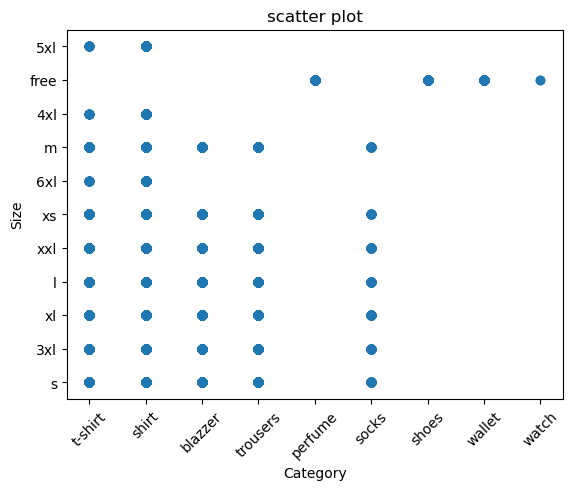

In [30]:
# prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']
# draw the scatter plot
plt.scatter(x_data, y_data)
plt.title('scatter plot')
plt.xlabel('Category')
plt.ylabel('Size')
plt.xticks(rotation = 45)
plt.show()

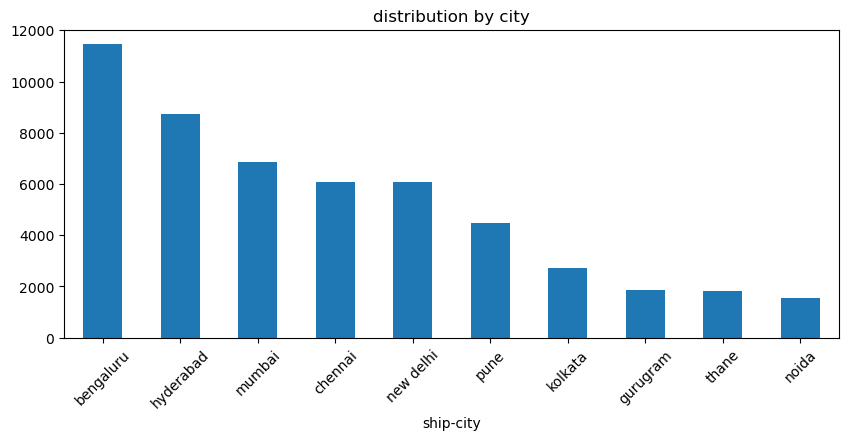

In [31]:
city_count = df['ship-city'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 4))
city_count.plot(kind = 'bar')
plt.title('distribution by city')
plt.xticks(rotation = 45)
plt.show()

Note- from above graph you can see that most of the buyers from bengaluru city

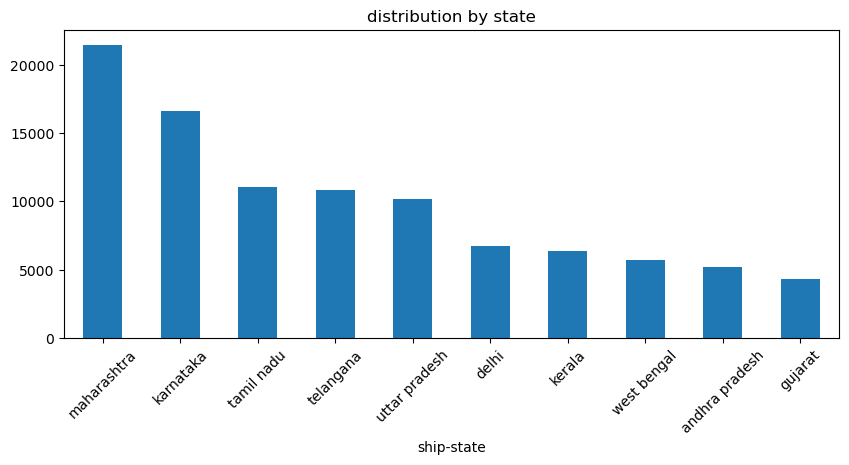

In [32]:
state_count = df['ship-state'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 4))
state_count.plot(kind = 'bar')
plt.title('distribution by state')
plt.xticks(rotation = 45)
plt.show()

Note- from above graph you can see that most of the buyers from maharashtra state

# Conclusion

The data analysis reveals that the business has significant customer base in maharashtra state, mainly serves retailers
fulfills orders through Amazon, experiences high demand for shirt and size m-size preferred choice among buyers.